In [2]:
import pandas as pd
import matplotlib.pyplot as plt

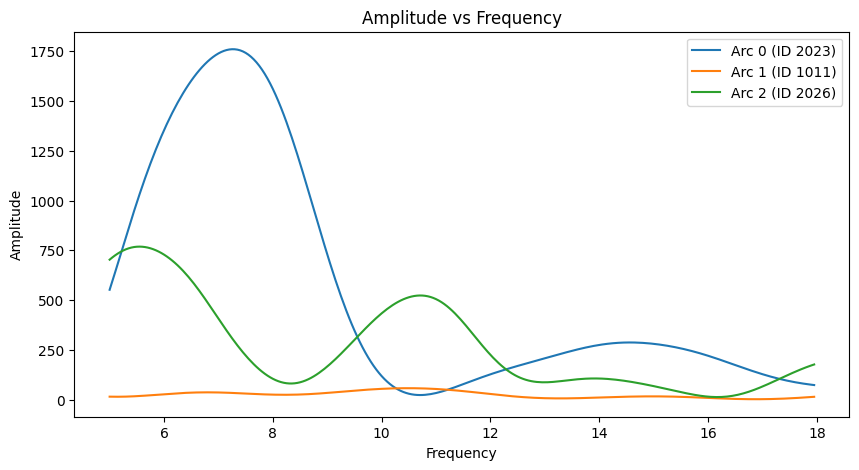

In [3]:
# Load the CSV files
arc_df = pd.read_csv('arc_freqs.csv')

# col 0 = id, col 1 = frequency, col 2 = amplitude
plt.figure(figsize=(10, 5))
for arc in arc_df['i'].unique():
    arc_data = arc_df[arc_df['i'] == arc]
    plt.plot(arc_data['frequency'], arc_data['amplitude'], label=f'Arc {arc} (ID {arc_data['id'].values[0]})')

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Frequency')
plt.legend()
plt.show()

In [48]:
# Find the frequency with the highest amplitude per id
idx = arc_df.groupby('i')['amplitude'].idxmax()
max_amp_freqs = arc_df.loc[idx, ['i','id', 'frequency', 'amplitude','num']]

# Remove outliers from the frequencies using the IQR method
Q1 = max_amp_freqs['frequency'].quantile(0.25)
Q3 = max_amp_freqs['frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(max_amp_freqs)
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
max_amp_freqs = max_amp_freqs[(max_amp_freqs['frequency'] >= lower_bound) & (max_amp_freqs['frequency'] <= upper_bound)]
n_outliers = arc_df['i'].nunique() - max_amp_freqs['i'].nunique()
print(f"Removed {n_outliers} outliers")

# Calculate average and standard deviation of these frequencies
avg_freq = max_amp_freqs['frequency'].mean()
std_freq = max_amp_freqs['frequency'].std()

print(f"\nAverage frequency: {avg_freq:.4f}")
print(f"Standard deviation: {std_freq:.4f}")

        i    id  frequency     amplitude   num
662     0  1029      11.62   7974.663617  1750
1884    1  1027      10.84   6076.719820  4060
3164    2  1008      10.64    165.551907   311
4484    3  1008      10.84  11729.350866  4014
5797    4  1013      10.97   7849.983801  4130
7340    5  1010      13.40   2308.325130  8750
8419    6  1001      11.19   9750.562655  4060
9689    7  1026      10.89  11021.325084  4060
10980   8  1002      10.80   4481.253569  4375
12368   9  1002      11.68   1205.560496   910
13570  10  1019      10.70   1542.053554  3150
14907  11  1019      11.07   3242.006562  1435
16162  12  1023      10.62   1701.643596  2975
17433  13  1023      10.33   3727.501880  5635
18802  14  1005      11.02   6842.598560  3885
20091  15  1024      10.91   5318.079193  3990
21352  16  1025      10.52    848.693800  1365
22714  17  1017      11.14   8316.513008  4095
24038  18  1014      11.38   4104.574885  9450
25309  19  1006      11.09   7011.322080  3920
26603  20  10

In [49]:
# DATA
n_obs = arc_df['i'].nunique()
mean_all = arc_df['frequency'].mean()
std_all = arc_df['frequency'].std()
outliers = n_outliers
mean_cleaned = avg_freq
std_cleaned = std_freq

print(f"{n_obs},{mean_all:.4f},{std_all:.4f},{outliers},{mean_cleaned:.4f},{std_cleaned:.4f}")

32,11.4950,3.7528,6,10.9573,0.2465


In [8]:
records = pd.read_csv('records.csv', header=1, names=["id", "time", "network", "band", "elevation", "azimuth", "snr"])


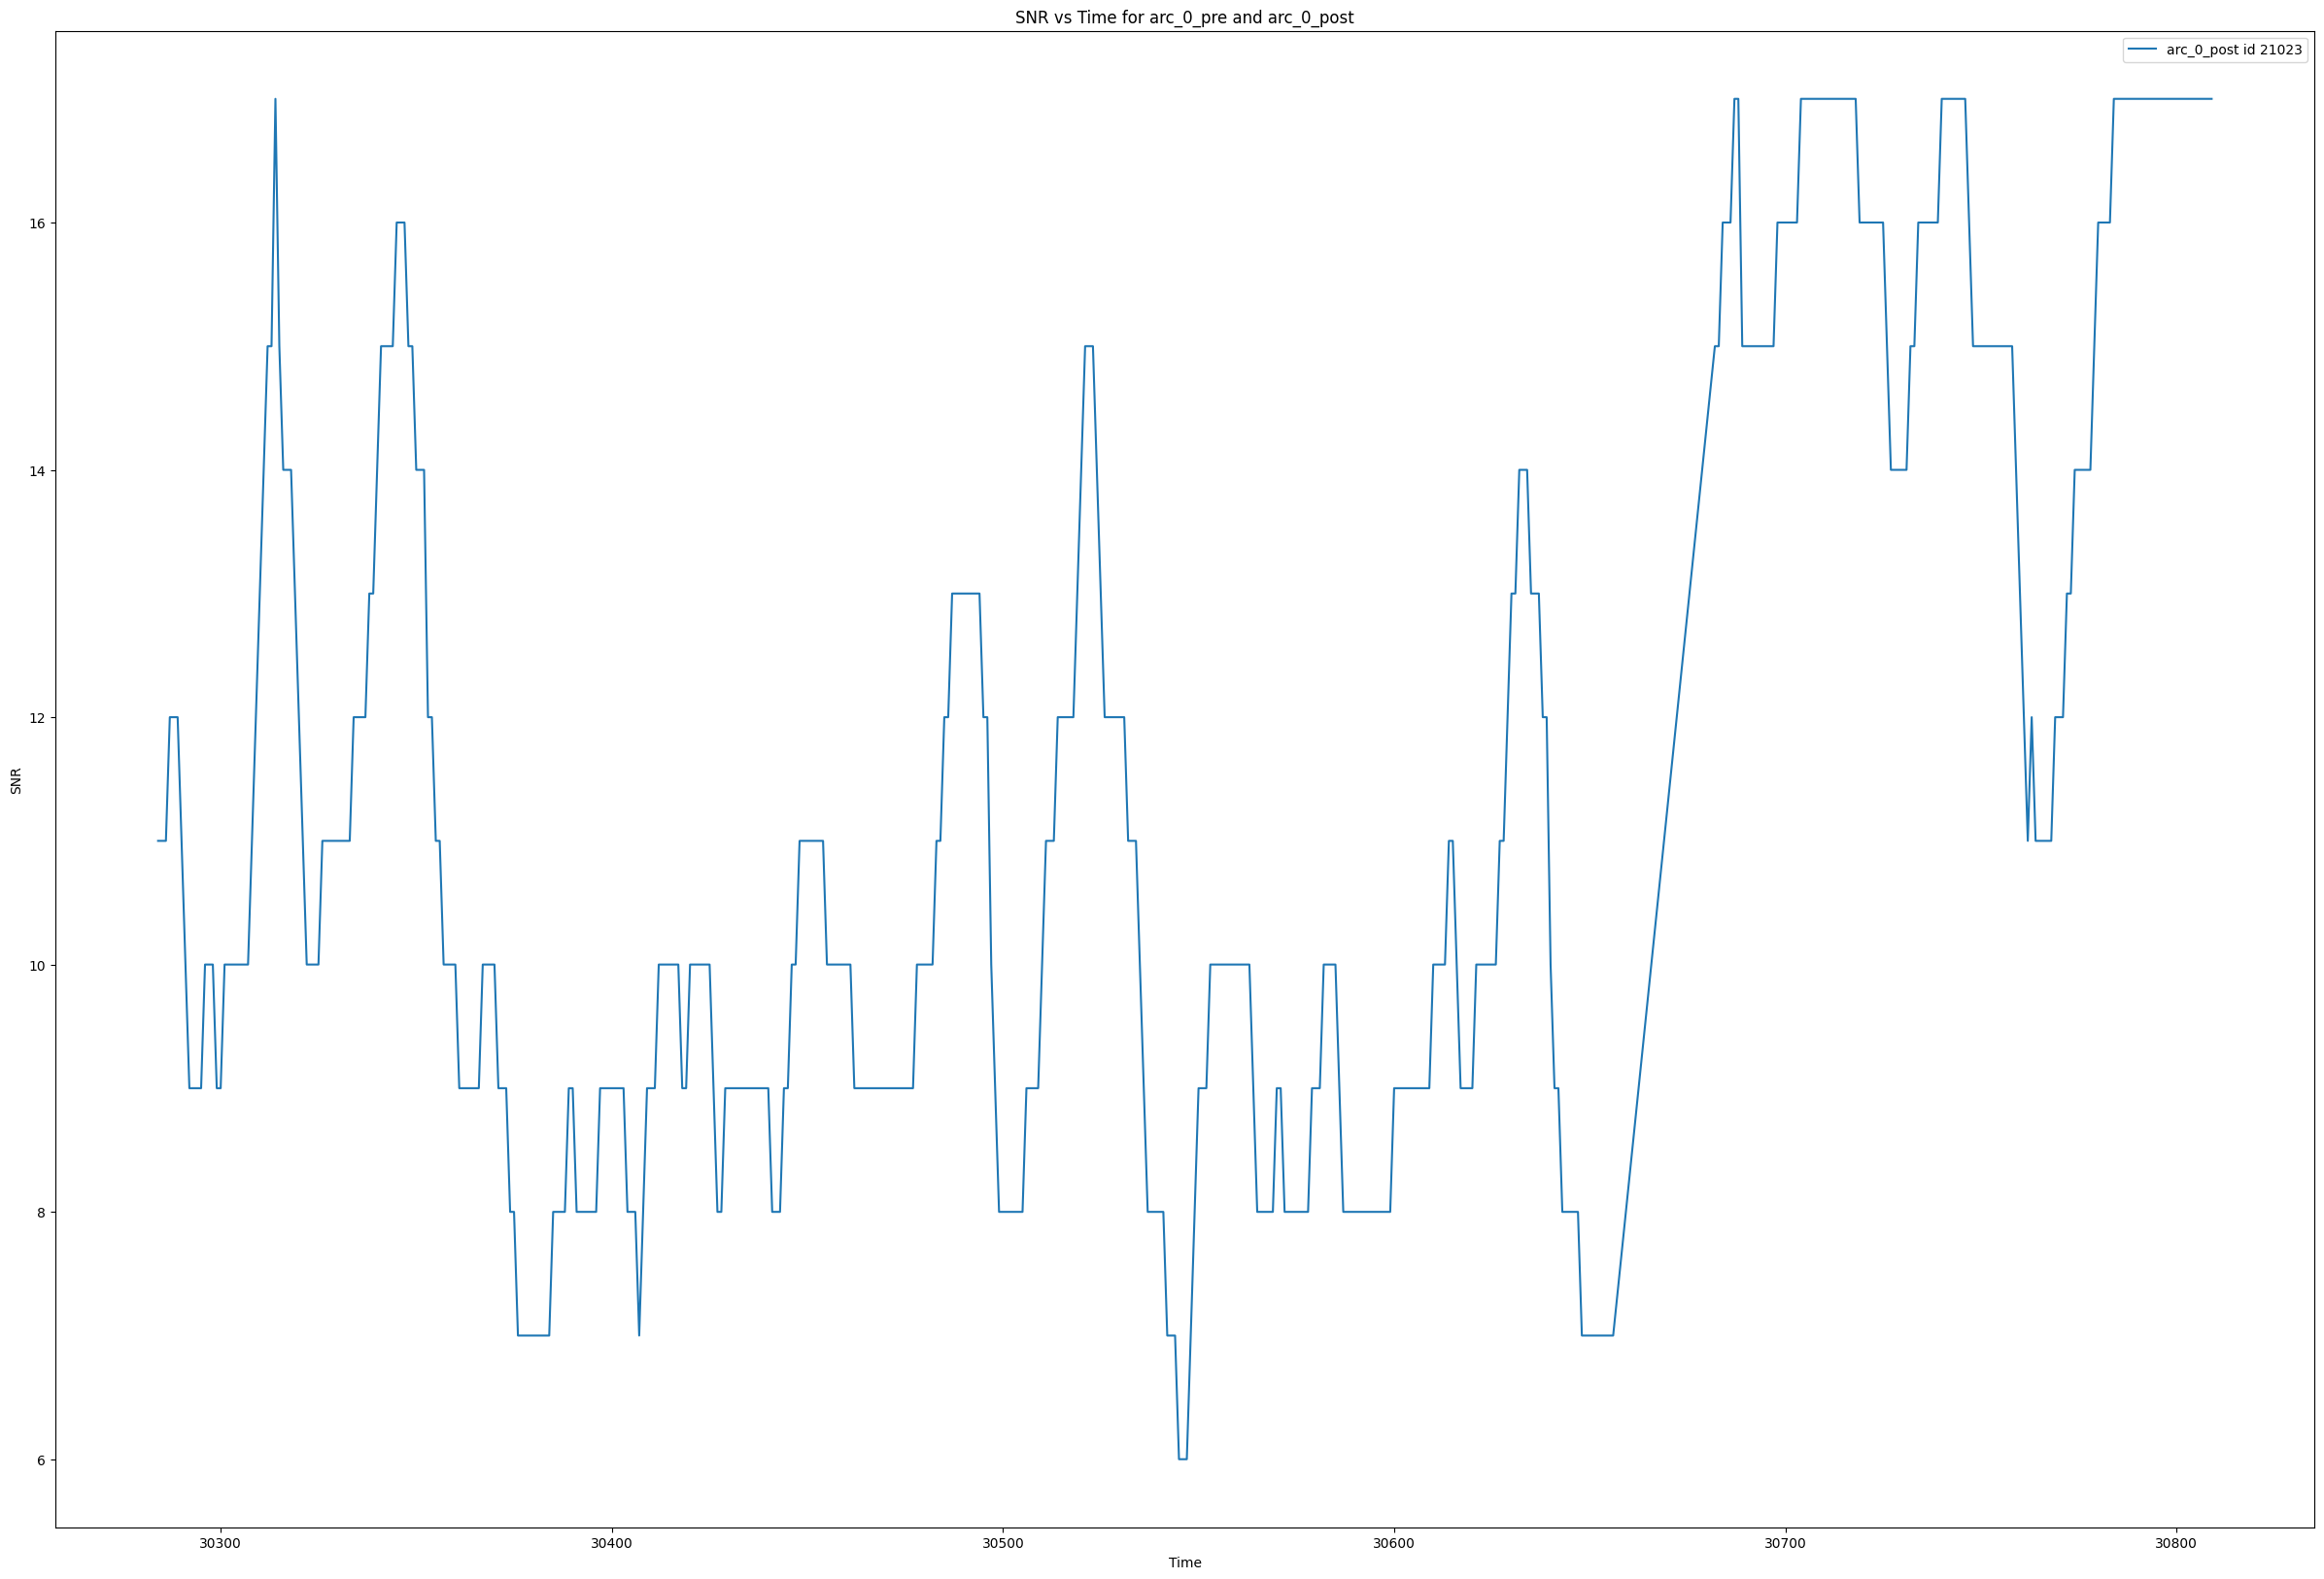

In [10]:
plt.figure(figsize=(30, 20))
for id_val in records['id'].unique():
    id_data = records[records['id'] == id_val]
    plt.plot(id_data['time'], id_data['snr'], label=f'arc_0_post id {id_val}')
    break # Remove this line to plot all ids

plt.xlabel('Time')
plt.ylabel('SNR')
plt.title('SNR vs Time for arc_0_pre and arc_0_post')
plt.legend()
plt.show()